In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import seaborn as sns


#%%
# Data source: 
# https://www.kaggle.com/c/zillow-prize-1/data
properties = pd.read_csv('properties_2017.csv')

#%%
train = pd.read_csv('train_2017.csv')
#train.columns


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

In [5]:
properties.shape

(2985217, 58)

In [7]:


#%%
properties.columns
properties.shape

#for col in properties:
#    #pass
#    #print(col)
#    print(col, properties.loc[:,col].isnull().sum())
#    #col.values.isnull()
#    
    
# Finds the number of missing values in each column
num_of_na = [properties.loc[:,col].isnull().sum() for col in properties]

# Divide by rows for proportion 
prop_na = [num / properties.shape[0] for num in num_of_na]

# sanity check
len(prop_na)


#%%
# Put the proporitons and column names into a df
na_df = pd.DataFrame({'prop_na' : prop_na, 'column' : properties.columns})
na_df = na_df.sort_values('prop_na')
na_df


,prop_na,column
0,0.000000,parcelid
17,0.000982,fips
33,0.000982,propertylandusetypeid
35,0.000982,rawcensustractandblock
37,0.000982,regionidcounty
25,0.000982,longitude
24,0.000982,latitude
52,0.000983,assessmentyear
5,0.000987,bedroomcnt
4,0.000991,bathroomcnt


/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


AxesSubplot(0.125,0.125;0.775x0.755)


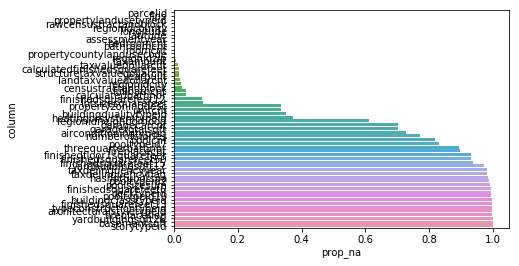

In [3]:

#%%
ax = sns.barplot(data=na_df, y='column', x='prop_na')
print(ax)

## Missing values  

Create 2 data sets:  

1. For NN:
    - Remove columns with most missing 
    - fill rest with -99999999999

2. For Xgboost:  
    - missing values OK  


## 1.

In [14]:
# Choose the threshold for the proportion of NA values beyond which 
# the column should be dropped
na_prop_threshold = .3

In [21]:
# Get the column names for the columns with enough values
good_cols = na_df.loc[na_df.prop_na < na_prop_threshold, 'column']
good_cols

0                         parcelid
17                            fips
33           propertylandusetypeid
35          rawcensustractandblock
37                  regionidcounty
25                       longitude
24                        latitude
52                  assessmentyear
5                       bedroomcnt
4                      bathroomcnt
40                         roomcnt
32       propertycountylandusecode
39                     regionidzip
54                       taxamount
51               taxvaluedollarcnt
11    calculatedfinishedsquarefeet
50      structuretaxvaluedollarcnt
47                       yearbuilt
53           landtaxvaluedollarcnt
36                    regionidcity
57             censustractandblock
19                     fullbathcnt
8                calculatedbathnbr
12            finishedsquarefeet12
26               lotsizesquarefeet
Name: column, dtype: object

In [27]:
# Make a new data set with only those columns
properties_nn = properties.loc[:, good_cols]
properties_nn.head()

,parcelid,fips,propertylandusetypeid,rawcensustractandblock,regionidcounty,longitude,latitude,assessmentyear,bedroomcnt,bathroomcnt,...,calculatedfinishedsquarefeet,structuretaxvaluedollarcnt,yearbuilt,landtaxvaluedollarcnt,regionidcity,censustractandblock,fullbathcnt,calculatedbathnbr,finishedsquarefeet12,lotsizesquarefeet
0,10754147,6037.0,269.0,6.037800e+07,3101.0,-118654084.0,34144442.0,2016.0,0.0,0.0,...,NaN,NaN,NaN,9.0,37688.0,NaN,NaN,NaN,NaN,85768.0
1,10759547,6037.0,261.0,6.037800e+07,3101.0,-118625364.0,34140430.0,2015.0,0.0,0.0,...,NaN,NaN,NaN,27516.0,37688.0,NaN,NaN,NaN,NaN,4083.0
2,10843547,6037.0,47.0,6.037703e+07,3101.0,-118394633.0,33989359.0,2016.0,0.0,0.0,...,73026.0,660680.0,1959.0,774261.0,51617.0,NaN,NaN,NaN,NaN,63085.0
3,10859147,6037.0,47.0,6.037141e+07,3101.0,-118437206.0,34148863.0,2016.0,0.0,0.0,...,5068.0,580059.0,1948.0,594416.0,12447.0,NaN,NaN,NaN,NaN,7521.0
4,10879947,6037.0,31.0,6.037123e+07,3101.0,-118385816.0,34194168.0,2016.0,0.0,0.0,...,1776.0,196751.0,1947.0,243350.0,12447.0,NaN,NaN,NaN,NaN,8512.0


In [28]:
# pandas fill 
properties_nn.fillna(value=-9999999, inplace=True)
properties_nn.head()

,parcelid,fips,propertylandusetypeid,rawcensustractandblock,regionidcounty,longitude,latitude,assessmentyear,bedroomcnt,bathroomcnt,...,calculatedfinishedsquarefeet,structuretaxvaluedollarcnt,yearbuilt,landtaxvaluedollarcnt,regionidcity,censustractandblock,fullbathcnt,calculatedbathnbr,finishedsquarefeet12,lotsizesquarefeet
0,10754147,6037.0,269.0,6.037800e+07,3101.0,-118654084.0,34144442.0,2016.0,0.0,0.0,...,-9999999.0,-9999999.0,-9999999.0,9.0,37688.0,-9999999.0,-9999999.0,-9999999.0,-9999999.0,85768.0
1,10759547,6037.0,261.0,6.037800e+07,3101.0,-118625364.0,34140430.0,2015.0,0.0,0.0,...,-9999999.0,-9999999.0,-9999999.0,27516.0,37688.0,-9999999.0,-9999999.0,-9999999.0,-9999999.0,4083.0
2,10843547,6037.0,47.0,6.037703e+07,3101.0,-118394633.0,33989359.0,2016.0,0.0,0.0,...,73026.0,660680.0,1959.0,774261.0,51617.0,-9999999.0,-9999999.0,-9999999.0,-9999999.0,63085.0
3,10859147,6037.0,47.0,6.037141e+07,3101.0,-118437206.0,34148863.0,2016.0,0.0,0.0,...,5068.0,580059.0,1948.0,594416.0,12447.0,-9999999.0,-9999999.0,-9999999.0,-9999999.0,7521.0
4,10879947,6037.0,31.0,6.037123e+07,3101.0,-118385816.0,34194168.0,2016.0,0.0,0.0,...,1776.0,196751.0,1947.0,243350.0,12447.0,-9999999.0,-9999999.0,-9999999.0,-9999999.0,8512.0


## 2.

In [4]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
